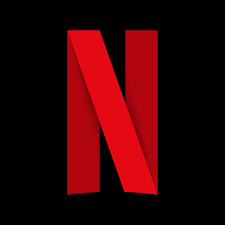

# General Assembly Final Project 
Exploratory Data Analysis for Netflix Dataset

Dataset Source:https://www.kaggle.com/shivamb/netflix-shows


In [547]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [548]:
try:
   prod=pd.read_csv("netflix_titles.csv",index_col="show_id")
except Exception as ex:
    template = "An exception of type {0} occurred. Arguments:\n{1!r}"
    message = template.format(type(ex).__name__, ex.args)
    print(ex)
    print("Make sure to include the dataset some.csv file in the same directory.")

In [549]:
print(f'I am using {pd.__name__} \
Version: {pd.__version__}.\n\
It is installed at: {pd.__path__}')

I am using pandas Version: 1.2.4.
It is installed at: ['/Users/cece/opt/anaconda3/lib/python3.8/site-packages/pandas']


## Understanding the Data Structure

In [550]:
prod.shape

(8807, 11)

In [551]:
prod.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


## Data Cleaning and Preparation

In [552]:
#test to see if there is any null values 
df=pd.read_csv("netflix_titles.csv",index_col="show_id")

In [553]:
df.isnull().sum().sort_values()

type               0
title              0
release_year       0
listed_in          0
description        0
duration           3
rating             4
date_added        10
cast             825
country          831
director        2634
dtype: int64

In [554]:
#drop the na value for columns that have less null results
df.dropna(subset=[ 'duration','date_added'],inplace=True)

In [555]:
#replace na with missing for other columns

df.director.fillna('missing', inplace=True)

In [556]:
df.cast.fillna('missing', inplace=True)

In [557]:
df.rating.fillna('missing', inplace=True)

In [558]:
df.country.fillna('missing',inplace=True)

In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8794 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8794 non-null   object
 1   title         8794 non-null   object
 2   director      8794 non-null   object
 3   cast          8794 non-null   object
 4   country       8794 non-null   object
 5   date_added    8794 non-null   object
 6   release_year  8794 non-null   int64 
 7   rating        8794 non-null   object
 8   duration      8794 non-null   object
 9   listed_in     8794 non-null   object
 10  description   8794 non-null   object
dtypes: int64(1), object(10)
memory usage: 824.4+ KB


In [560]:
#checking if there is any duplicated values 
df.duplicated().sum()

0

## Build a Search Function 

In [ ]:
# create a programme that search for avaliability and description 

class Search():
    
    def __init__(self,filename):
        self.dataset = pd.read_csv(filename)
    def serialize_by_fields(self, dataset, *args):
        return dataset[[*args]]
    
    def search_by_title(self, title, *args):
        return self.serialize_by_fields(self.dataset[self.dataset['title'].str.contains(title,case=False,na=False)], *args)
    
    def search_by_genre(self, genre, *args):
        return self.serialize_by_fields(self.dataset[self.dataset['listed_in'].str.contains(genre,case=False,na=False)], *args)
    
    def Kids_friendly(self, description, *args):
        return self.serialize_by_fields(self.dataset[(self.dataset['description'].str.contains(description,case=False,na=False))&(self.dataset['rating'].isin(['PG-13']))], *args)
    
    

In [ ]:
engine = Search("netflix_titles.csv")
#self.dataset = pandas.read_csv("netflix_titles.csv",index_col="show_id")

ask_title = input("Type the title looking for:")
ask_fields = input("Type columns to output(e.g.title,duration,cast,description), seperate by space: ")
engine.search_by_title(ask_title, *ask_fields.split())



In [ ]:
engine = Search("netflix_titles.csv")

ask_genre = input("Type the genre looking for:")
ask_fields = input("Type columns to output(e.g.title,duration,cast,description), seperate by space: ")
engine.search_by_genre(ask_genre, *ask_fields.split())


In [ ]:
engine = Search("netflix_titles.csv")

ask_description = input("Type the keyword looking for:")
ask_fields = input("Type columns to output(e.g.title,duration,cast,description), seperate by space: ")
engine.Kids_friendly(ask_description, *ask_fields.split())

## Netflix Selection & Timeliness Analysis

In this section, we will be exploring Netflix selection and how timely netflix can bring new movies/shows. 

Conclusions: 
1. Most of the movie/show on Netflix are relative up-to-date (released in 2020)
2. Netflix is able to add shows/movies in the same year which they were released. This demonstrates that Netflix is putting efforts in adding the newest-released movies/shows for each year. 
3. Netflix may intentionally add old shows/movides (defined by movies/shows released before 2000) back on Netflix as part of their selection strategy. 
4. Netflix start to focus more on adding movies selections rather than TV shows in recent years (since 2015)

Text(0.5, 1.0, 'released year distribution')

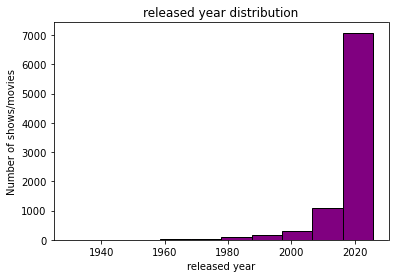

In [232]:
#Understand the release year 
plt.hist(df['release_year'], align='right', color='purple', edgecolor='black')
plt.xlabel("released year")
plt.ylabel("Number of shows/movies")
plt.title("released year distribution")

Text(0.5, 1.0, 'show/movie distribution')

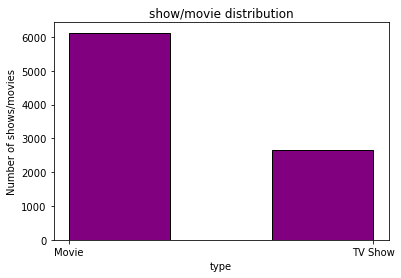

In [233]:
# understand the distribution of type of movie/show
plt.hist(df['type'], bins=3, color='purple', edgecolor='black',align='mid')
plt.xlabel("type")
plt.ylabel("Number of shows/movies")
plt.title("show/movie distribution")


Text(0.5, 1.0, 'relationship between release_year and year_added to Netflix')

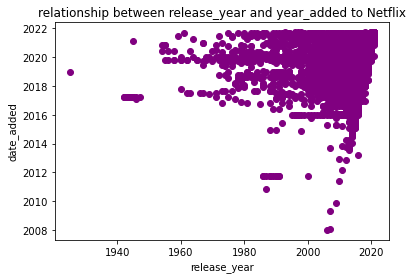

In [278]:
#understand the relationship between date_added and released_year
df['date_added']=pd.to_datetime(df['date_added'])
plt.scatter(df['release_year'],df['date_added'],color='purple')
plt.xlabel("release_year")
plt.ylabel("date_added")
plt.title("relationship between release_year and year_added to Netflix")

Text(0.5, 1.0, 'between movies/shows released and year added to Netflix')

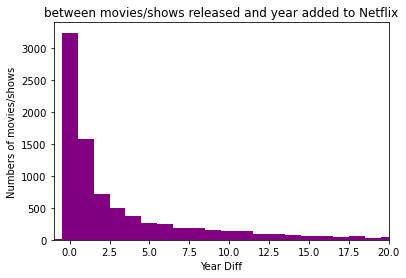

In [285]:
# explore when release year= date/year added 

df['year_added_new']=pd.DatetimeIndex(df['date_added']).year
df['yr_diff']=df['year_added_new']-df['release_year']

groupBydatediff=df['title'].groupby(df['yr_diff']).count().reset_index()

plt.bar(groupBydatediff['yr_diff'],groupBydatediff['title'],width=1,color='purple')
plt.xlim(-1,20)

plt.xlabel('Year Diff')
plt.ylabel('Numbers of movies/shows')
plt.title ('between movies/shows released and year added to Netflix')

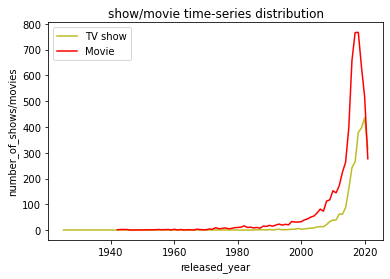

In [47]:
# understand the distribution of released_years for TV shows and movies

#filter df
filter_df=df[df.type=='TV Show']
filter_df_2=df[df.type=='Movie']

plt.plot(filter_df.groupby(['release_year']).count()['title'],label='TV show',color='tab:olive')
plt.plot(filter_df_2.groupby(['release_year']).count()['title'],label='Movie',color='red')
plt.xlabel('released_year')
plt.ylabel('number_of_shows/movies')
plt.title("show/movie time-series distribution")
plt.legend()

In [50]:
# understand the distribution between genre over time (date_added)
df['year_added']=pd.DatetimeIndex(df['date_added']).year
df.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
show_id,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021


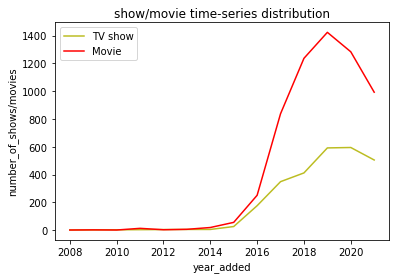

In [51]:
filter_df=df[df.type=='TV Show']
filter_df_2=df[df.type=='Movie']

plt.plot(filter_df.groupby(['year_added']).count()['title'],label='TV show',color='tab:olive')
plt.plot(filter_df_2.groupby(['year_added']).count()['title'],label='Movie',color='red')
plt.xlabel('year_added')
plt.ylabel('number_of_shows/movies')
plt.title("show/movie time-series distribution")
plt.legend()

## Exploring Genre Selection Strategy

conclusion: 
1. No.1 Category/Genre (defined by numbers of movies/shows avaliable on Netflix) is international movies. The smallest selection category is Classic/Cult TV and Stand-Up Comedy & Talk Shows. 
2. Although international movies has been the top 1 selection category on Netflix, Netflix has added more drama category compared to international movies in recent years. 
3. Within the top 10 selection category on Netflix, there is a clear selection strategy to backfill old/previous movies/shows selections (except international TV shows, documentary and independent movies) 
4. Comparing international movies and international TV shows, although both of these categories are within the Top 10 selections, there isn't a focus on backfilling old international TV shows but rather focusing on bringing new international TV shows. 


In [54]:
# creating a set of unique genre
#prep=df['listed_in'].str.cat(sep=', ').split(', ')
prep_set=set(df['listed_in'].str.cat(sep=', ').split(', '))
print(prep_set)

{'Spanish-Language TV Shows', 'TV Thrillers', 'International Movies', 'LGBTQ Movies', 'Reality TV', 'Classic & Cult TV', 'Sports Movies', 'British TV Shows', 'Classic Movies', 'Dramas', 'Music & Musicals', 'Korean TV Shows', 'TV Dramas', 'Docuseries', 'Romantic Movies', 'Action & Adventure', 'Movies', 'Sci-Fi & Fantasy', 'TV Shows', 'Documentaries', 'TV Horror', 'TV Sci-Fi & Fantasy', 'Faith & Spirituality', 'Cult Movies', "Kids' TV", 'Comedies', 'Stand-Up Comedy', 'Independent Movies', 'Horror Movies', 'Children & Family Movies', 'TV Comedies', 'TV Mysteries', 'TV Action & Adventure', 'Anime Features', 'Science & Nature TV', 'Romantic TV Shows', 'Teen TV Shows', 'Thrillers', 'Anime Series', 'Stand-Up Comedy & Talk Shows', 'Crime TV Shows', 'International TV Shows'}


In [67]:
listed_in = []
for i in range(len(df)):
    listed_in.extend(df.listed_in.iloc[i].split(','))
    

new_list=[]
for i in listed_in:
    new_list.append(i.strip())
print(new_list)

['Documentaries', 'International TV Shows', 'TV Dramas', 'TV Mysteries', 'Crime TV Shows', 'International TV Shows', 'TV Action & Adventure', 'Docuseries', 'Reality TV', 'International TV Shows', 'Romantic TV Shows', 'TV Comedies', 'TV Dramas', 'TV Horror', 'TV Mysteries', 'Children & Family Movies', 'Dramas', 'Independent Movies', 'International Movies', 'British TV Shows', 'Reality TV', 'Comedies', 'Dramas', 'Crime TV Shows', 'Docuseries', 'International TV Shows', 'Crime TV Shows', 'International TV Shows', 'TV Action & Adventure', 'Dramas', 'International Movies', 'Children & Family Movies', 'Comedies', 'British TV Shows', 'Crime TV Shows', 'Docuseries', 'TV Comedies', 'TV Dramas', 'Documentaries', 'International Movies', 'Crime TV Shows', 'Spanish-Language TV Shows', 'TV Dramas', 'Thrillers', 'International TV Shows', 'Spanish-Language TV Shows', 'TV Action & Adventure', 'Crime TV Shows', 'Docuseries', 'International TV Shows', 'International TV Shows', 'TV Action & Adventure', 'T

In [140]:
listed_dic = {}
for i in new_list:
    listed_dic[i] = new_list.count(i)
#print(listed_dic)

listed_in_data = {'Genre': listed_dic.keys(), 'Number_of_Movies/shows': listed_dic.values()}

new_data=pd.DataFrame.from_dict(listed_in_data).sort_values(by='Number_of_Movies/shows',ascending=False)
new_data.set_index('Genre')

,Number_of_Movies/shows
Genre,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1350
Documentaries,869
Action & Adventure,859
TV Dramas,762
Independent Movies,756
Children & Family Movies,641


{'Genre': dict_keys(['Documentaries', 'International TV Shows', 'TV Dramas', 'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure', 'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies', 'TV Horror', 'Children & Family Movies', 'Dramas', 'Independent Movies', 'International Movies', 'British TV Shows', 'Comedies', 'Spanish-Language TV Shows', 'Thrillers', 'Romantic Movies', 'Music & Musicals', 'Horror Movies', 'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV", 'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies', 'Anime Features', 'Sports Movies', 'Anime Series', 'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows', 'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies', 'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows', 'Classic & Cult TV']), 'Number_of_Movies/shows': dict_values([869, 1350, 762, 98, 469, 167, 394, 255, 370, 574, 75, 641, 2427, 756, 2752, 252, 1674, 173, 577, 616, 375, 357, 243, 57, 449, 859, 83, 116, 71, 219, 175, 151, 92,

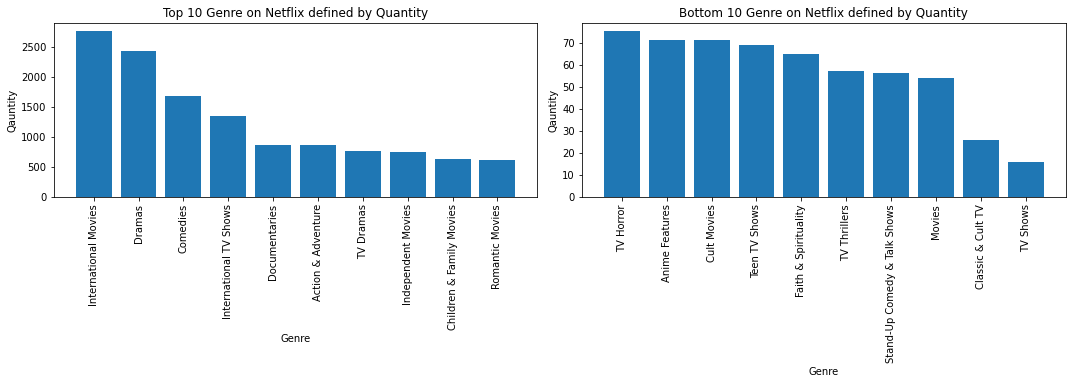

In [127]:
plt.subplots(figsize=(15, 8))

plt.subplot(2,2,1)
data=pd.DataFrame(listed_in_data).sort_values(by='Number_of_Movies/shows',ascending=False).head(10)
plt.bar(data['Genre'],data['Number_of_Movies/shows'])
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Qauntity")
plt.title ("Top 10 Genre on Netflix defined by Quantity")


plt.subplot(2,2,2)
data=pd.DataFrame(listed_in_data).sort_values(by='Number_of_Movies/shows',ascending=False).tail(10)
plt.bar(data['Genre'],data['Number_of_Movies/shows'])
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Qauntity")
plt.title ("Bottom 10 Genre on Netflix defined by Quantity")

plt.tight_layout()


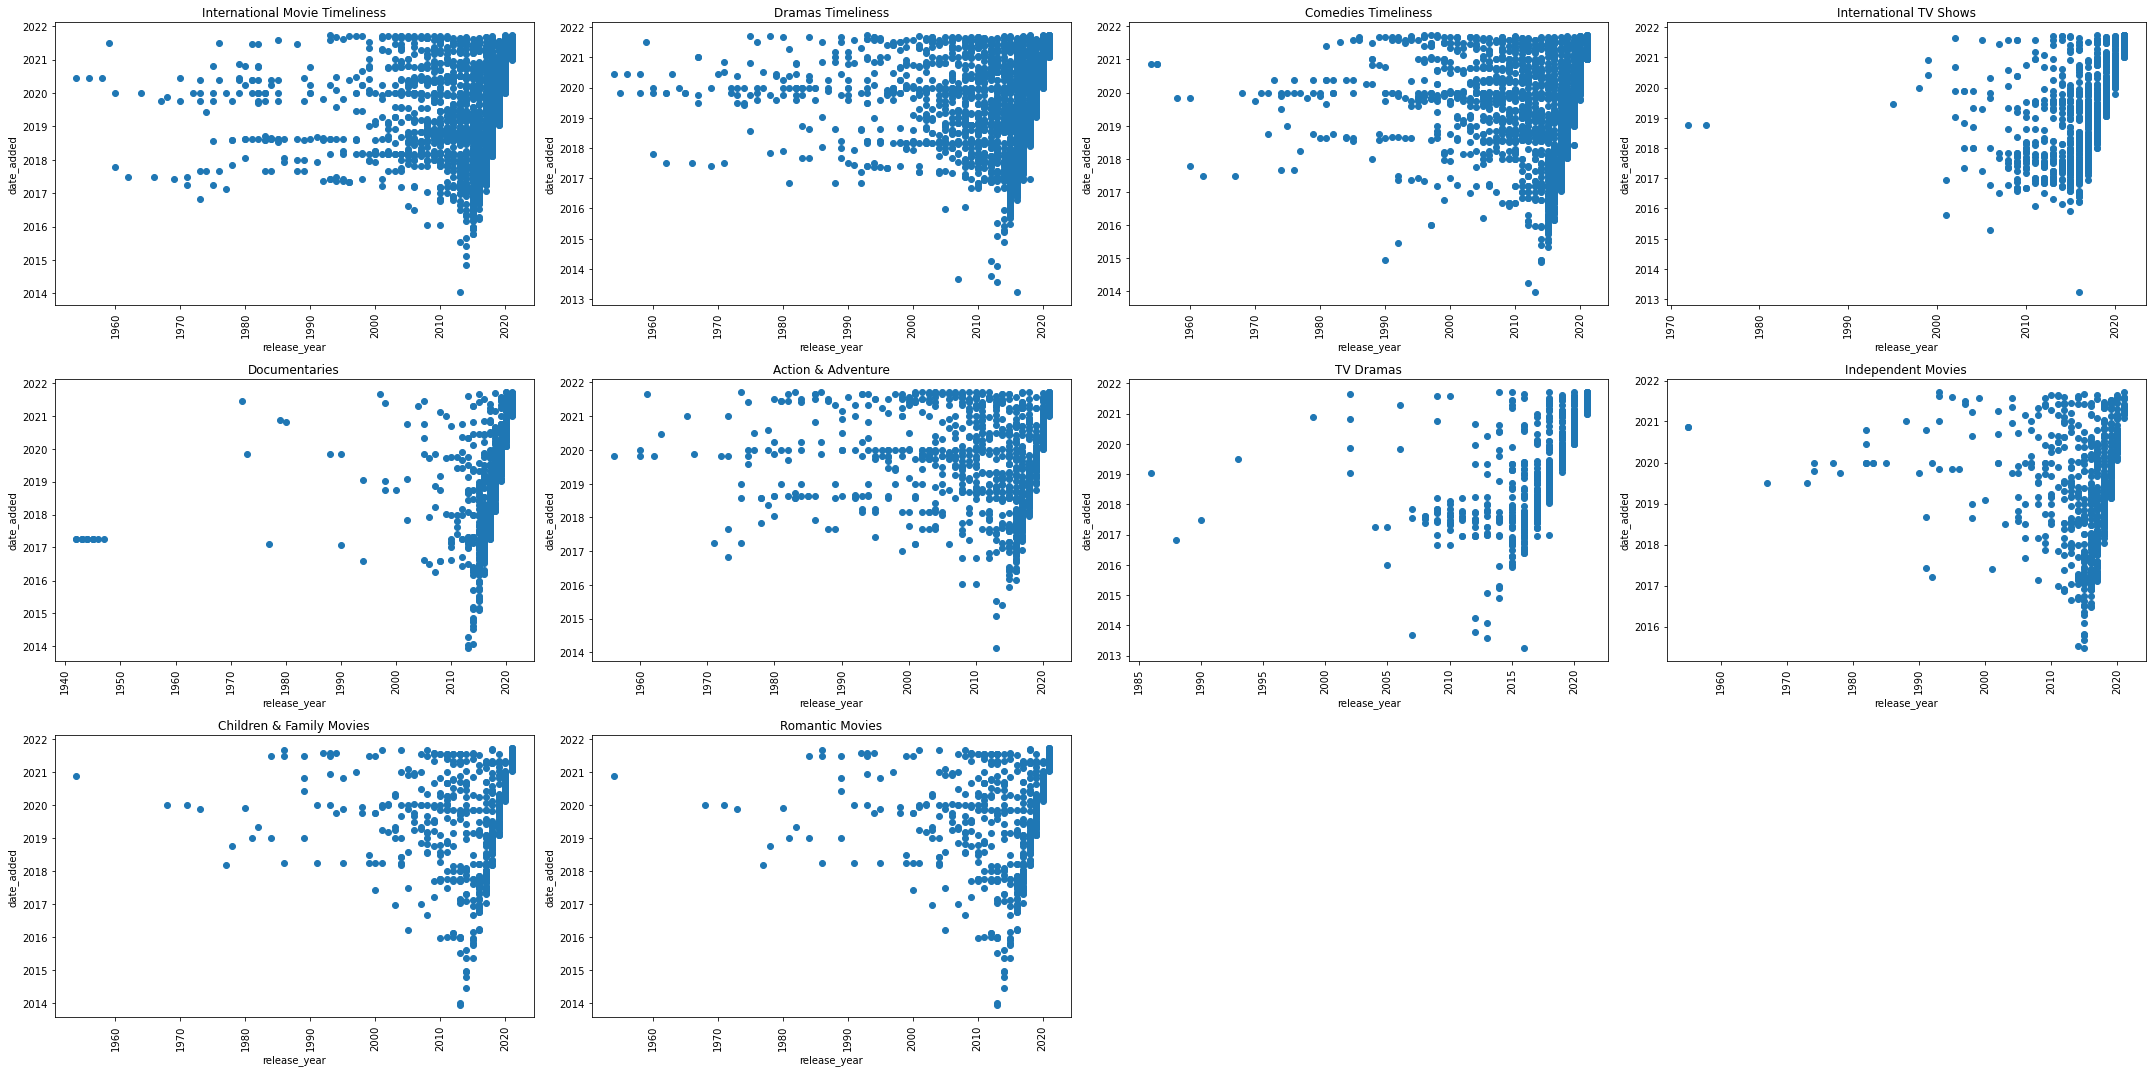

In [163]:
# understand the distribution of genres by released_year (for top 10 genres)
#by understanding the distribution of released_year, we are able to understand for each genres, 
#what is the most up-to-date/aged film/movie users are able to watch on Netflix

df_new=df[df['date_added']>='2013-01-01']

filter_genre_1=df_new[df_new.listed_in.str.contains("International Movies")]
filter_genre_2=df_new[df_new.listed_in.str.contains("Dramas")]
filter_genre_3=df_new[df_new.listed_in.str.contains("Comedies")]
filter_genre_4=df_new[df_new.listed_in.str.contains("International TV Shows")]
filter_genre_5=df_new[df_new.listed_in.str.contains("Documentaries")]
filter_genre_6=df_new[df_new.listed_in.str.contains("Action & Adventure")]
filter_genre_7=df_new[df_new.listed_in.str.contains("TV Dramas")]
filter_genre_8=df_new[df_new.listed_in.str.contains("Independent Movies")]
filter_genre_9=df_new[df_new.listed_in.str.contains("Children & Family Movies")]
filter_genre_10=df_new[df_new.listed_in.str.contains("Romantic Movies")]


#fig,ax=plt.subplots(figsize=(15,7))

plt.subplots(figsize=(30, 15))

plt.subplot(3,4,1)
plt.scatter(filter_genre_1['release_year'],filter_genre_1['date_added'])
plt.xticks(rotation=90)
plt.xlabel("release_year")
plt.ylabel("date_added")
plt.title ("International Movie Timeliness")

plt.subplot(3,4,2)
plt.scatter(filter_genre_2['release_year'],filter_genre_2['date_added'])
plt.xticks(rotation=90)
plt.xlabel("release_year")
plt.ylabel("date_added")
plt.title ("Dramas Timeliness")

plt.subplot(3,4,3)
plt.scatter(filter_genre_3['release_year'],filter_genre_3['date_added'])
plt.xticks(rotation=90)
plt.xlabel("release_year")
plt.ylabel("date_added")
plt.title ("Comedies Timeliness")

plt.subplot(3,4,4)
plt.scatter(filter_genre_4['release_year'],filter_genre_4['date_added'])
plt.xticks(rotation=90)
plt.xlabel("release_year")
plt.ylabel("date_added")
plt.title ("International TV Shows")

plt.subplot(3,4,5)
plt.scatter(filter_genre_5['release_year'],filter_genre_5['date_added'])
plt.xticks(rotation=90)
plt.xlabel("release_year")
plt.ylabel("date_added")
plt.title ("Documentaries")

plt.subplot(3,4,6)
plt.scatter(filter_genre_6['release_year'],filter_genre_6['date_added'])
plt.xticks(rotation=90)
plt.xlabel("release_year")
plt.ylabel("date_added")
plt.title ("Action & Adventure")

plt.subplot(3,4,7)
plt.scatter(filter_genre_7['release_year'],filter_genre_7['date_added'])
plt.xticks(rotation=90)
plt.xlabel("release_year")
plt.ylabel("date_added")
plt.title ("TV Dramas")

plt.subplot(3,4,8)
plt.scatter(filter_genre_8['release_year'],filter_genre_8['date_added'])
plt.xticks(rotation=90)
plt.xlabel("release_year")
plt.ylabel("date_added")
plt.title ("Independent Movies")

plt.subplot(3,4,9)
plt.scatter(filter_genre_9['release_year'],filter_genre_9['date_added'])
plt.xticks(rotation=90)
plt.xlabel("release_year")
plt.ylabel("date_added")
plt.title ("Children & Family Movies")

plt.subplot(3,4,10)
plt.scatter(filter_genre_9['release_year'],filter_genre_9['date_added'])
plt.xticks(rotation=90)
plt.xlabel("release_year")
plt.ylabel("date_added")
plt.title ("Romantic Movies")

plt.tight_layout()
plt.show()


<ipython-input-168-23851b69ac22>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,1,1)


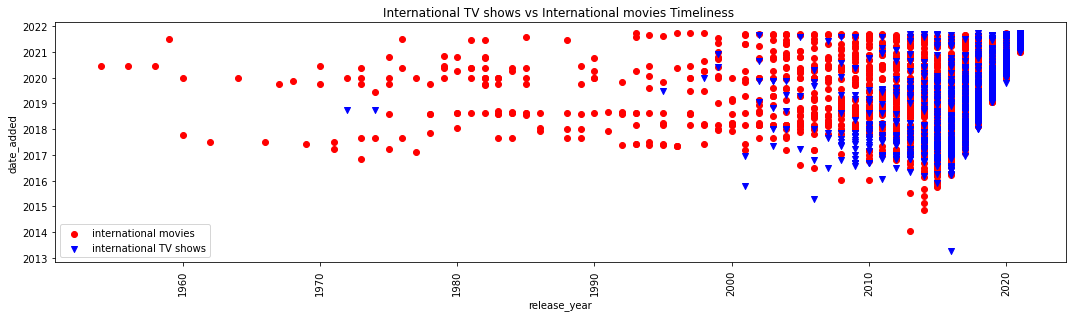

In [168]:
#Compare international movies & international TV shows Selection Strategy

plt.subplots(figsize=(15, 8))

plt.subplot(2,1,1)
plt.scatter(filter_genre_1['release_year'],filter_genre_1['date_added'],color='red',marker='o',label='international movies')
plt.xticks(rotation=90)
plt.xlabel("release_year")
plt.ylabel("date_added")


plt.subplot(2,1,1)
plt.scatter(filter_genre_4['release_year'],filter_genre_4['date_added'],color='blue',marker='v',label='international TV shows')
plt.xticks(rotation=90)
plt.xlabel("release_year")
plt.ylabel("date_added")
plt.title ("International TV shows vs International movies Timeliness ")

plt.legend()
plt.tight_layout()
plt.show()


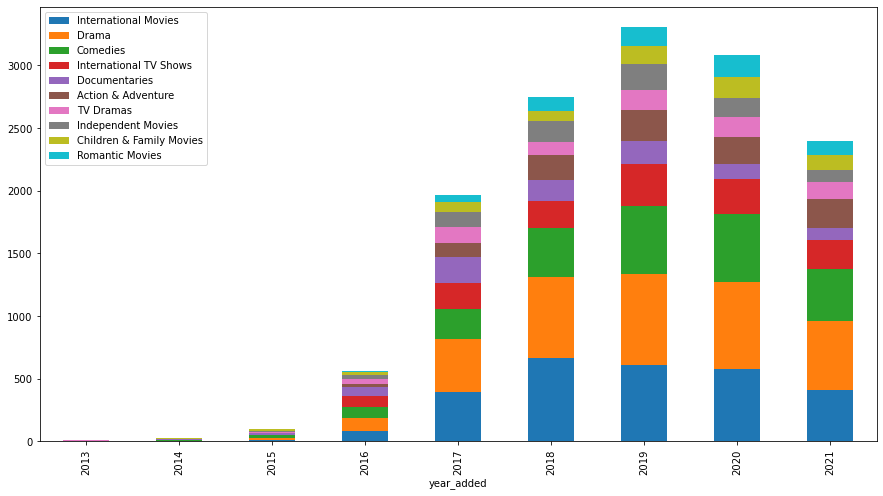

In [369]:
# which category have been added the most in recent years(top 10 category)? what is the focus of Netflix selections? 


setA=filter_genre_1['title'].groupby(filter_genre_1['year_added']).count().reset_index().rename(columns={'title':'International Movies'})
setB=filter_genre_2['title'].groupby(filter_genre_2['year_added']).count().reset_index().rename(columns={'title':'Drama'})
setC=filter_genre_3['title'].groupby(filter_genre_3['year_added']).count().reset_index().rename(columns={'title':'Comedies'})
setD=filter_genre_4['title'].groupby(filter_genre_4['year_added']).count().reset_index().rename(columns={'title':'International TV Shows'})
setE=filter_genre_5['title'].groupby(filter_genre_5['year_added']).count().reset_index().rename(columns={'title':'Documentaries'})
setF=filter_genre_6['title'].groupby(filter_genre_6['year_added']).count().reset_index().rename(columns={'title':'Action & Adventure'})
setG=filter_genre_7['title'].groupby(filter_genre_7['year_added']).count().reset_index().rename(columns={'title':'TV Dramas'})
setH=filter_genre_8['title'].groupby(filter_genre_8['year_added']).count().reset_index().rename(columns={'title':'Independent Movies'})
setI=filter_genre_9['title'].groupby(filter_genre_9['year_added']).count().reset_index().rename(columns={'title':'Children & Family Movies'})
setJ=filter_genre_10['title'].groupby(filter_genre_10['year_added']).count().reset_index().rename(columns={'title':'Romantic Movies'})


dfA=pd.merge(setA,setB,how='outer')
dfB=pd.merge(dfA,setC,how='outer')
dfC=pd.merge(dfB,setD,how='outer')
dfD=pd.merge(dfC,setE,how='outer')
dfE=pd.merge(dfD,setF,how='outer')
dfF=pd.merge(dfE,setG,how='outer')
dfG=pd.merge(dfF,setH,how='outer')
dfH=pd.merge(dfG,setI,how='outer')
df_category=pd.merge(dfH,setJ,how='outer')

df_category=pd.DataFrame(data=df_category).sort_values(by='year_added',ascending=True)

df_category.plot.bar('year_added',['International Movies','Drama','Comedies','International TV Shows','Documentaries','Action & Adventure','TV Dramas','Independent Movies','Children & Family Movies','Romantic Movies'],stacked=True,width=0.5,figsize=(15,8))
plt.show()

## Netflix International Expansion & Geo Selection Analysis  

This section explores the geo expansion strategy of Netflix and analyzes the differences of selection strategy within geos. 

Conclusion：
1. Netflix has the most selections in the U.S. It started its foucs in international expansion (especially in Asia and Europe Mega-Region since 2017) 

2. The top 1 selection for Asia,Europe and LATAM mega-region is Internationoal Movies while the Top 1 for USC region is Drama. 

3. Cultural-specific TV shows/movies were added as a part of Netflix's international expansion Strategy. For exmaple, Spanish-specific content were added to LATAM region (ranked No.2 in LATAM region). Anime and Korean drama selection were also added to Asia region. 


In [402]:
#drop missing country rows for analysis

df=df[df['country']!='missing']

In [574]:
#explore when were content added for each country ( expansion timeline) 
#print(df)

df.reset_index()
df['year_added']=pd.DatetimeIndex(df['date_added']).year

#create a set of unique country
prep_country=set(df['country'].str.cat(sep=', ').split(', '))
#print(prep_country)


country_in = []
for i in range(len(df)):
    country_in.extend(df.country.iloc[i].split(','))
    
#removing spacing and trailing
new_list_country=[]
for i in country_in:
    new_list_country.append(i.strip())

# count occurance of countries
listed_dic_country = {}
for i in new_list:
    listed_dic_country[i] = new_list_country.count(i)
#print(listed_dic)

listed_in_country = {'Country': listed_dic_country.keys(), 'Number_of_Movies/shows': listed_dic_country.values()}
#print(listed_in_country)
new_data_country=pd.DataFrame.from_dict(listed_in_country).sort_values(by='Number_of_Movies/shows',ascending=False)
new_data_country.set_index('Country')
print(new_data_country)


            Country  Number_of_Movies/shows
0     United States                    3681
2             India                    1046
5    United Kingdom                     805
15           Canada                     445
12           France                     393
..              ...                     ...
98          Ecuador                       1
99          Armenia                       1
100        Mongolia                       1
101         Bahamas                       1
122      Montenegro                       1

[123 rows x 2 columns]


Text(0.5, 1.0, 'Movies/shows Distribution By Country')

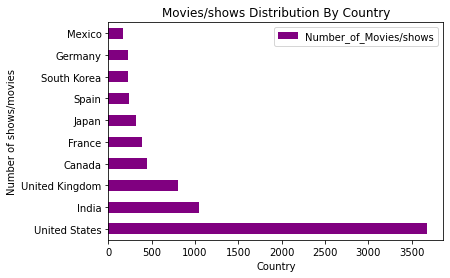

In [575]:
new_data_country[:10].plot(x='Country',y='Number_of_Movies/shows',kind='barh',color='purple')
plt.ylabel("Number of shows/movies")
plt.xlabel("Country")
plt.title("Movies/shows Distribution By Country")

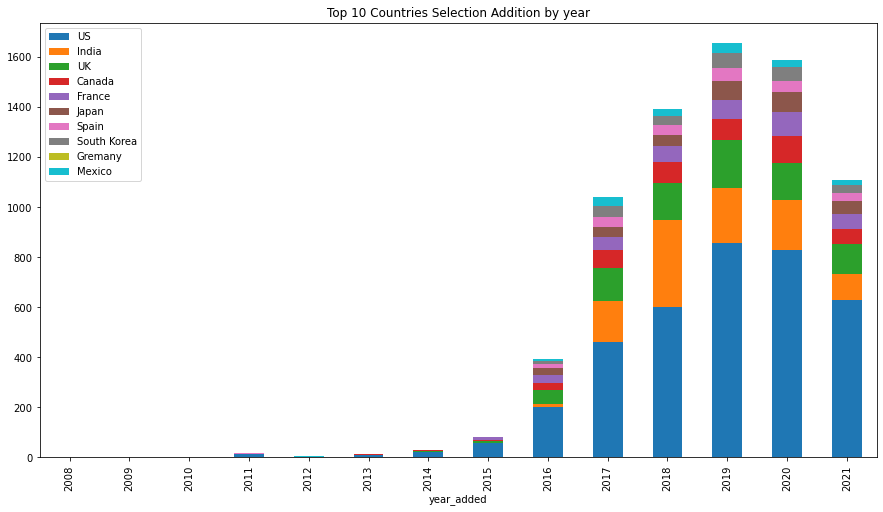

In [576]:
#explore when did Netflix started to add content for each countries (top 10) 

us_data=df[df.country.str.contains('United States')]['title'].groupby(df['year_added']).count().reset_index()
us_data=us_data.rename(columns={'title':'US'})

india_data=df[df.country.str.contains('India')]['title'].groupby(df['year_added']).count().reset_index()
india_data=india_data.rename(columns={'title':'India'})

uk_data=df[df.country.str.contains('United Kingdom')]['title'].groupby(df['year_added']).count().reset_index()
uk_data=uk_data.rename(columns={'title':'UK'})

can_data=df[df.country.str.contains('Canada')]['title'].groupby(df['year_added']).count().reset_index()
can_data=can_data.rename(columns={'title':'Canada'})

france_data=df[df.country.str.contains('France')]['title'].groupby(df['year_added']).count().reset_index()
france_data=france_data.rename(columns={'title':'France'})

Japan_data=df[df.country.str.contains('Japan')]['title'].groupby(df['year_added']).count().reset_index()
Japan_data=Japan_data.rename(columns={'title':'Japan'})

Spain_data=df[df.country.str.contains('Spain')]['title'].groupby(df['year_added']).count().reset_index()
Spain_data=Spain_data.rename(columns={'title':'Spain'})

SouthKorea_data=df[df.country.str.contains('South Korea')]['title'].groupby(df['year_added']).count().reset_index()
SouthKorea_data=SouthKorea_data.rename(columns={'title':'South Korea'})

Gremany_data=df[df.country.str.contains('Gremany')]['title'].groupby(df['year_added']).count().reset_index()
Gremany_data=Gremany_data.rename(columns={'title':'Gremany'})

Mexico_data=df[df.country.str.contains('Mexico')]['title'].groupby(df['year_added']).count().reset_index()
Mexico_data=Mexico_data.rename(columns={'title':'Mexico'})


data1=pd.merge(us_data,india_data,how='outer')
data2=pd.merge(data1,uk_data,how='outer')
data3=pd.merge(data2,can_data,how='outer')
data4=pd.merge(data3,france_data,how='outer')
data5=pd.merge(data4,Japan_data,how='outer')
data6=pd.merge(data5,Spain_data,how='outer')
data7=pd.merge(data6,SouthKorea_data,how='outer')
data8=pd.merge(data7,Gremany_data,how='outer')
data9=pd.merge(data8,Mexico_data,how='outer')


data9.plot.bar('year_added',['US','India','UK','Canada','France','Japan','Spain','South Korea','Gremany','Mexico'],stacked=True,width=0.5,figsize=(15,8))
plt.title('Top 10 Countries Selection Addition by year')

plt.show()


Text(0.5, 1.0, 'Mega-Region Selection Addition by year')

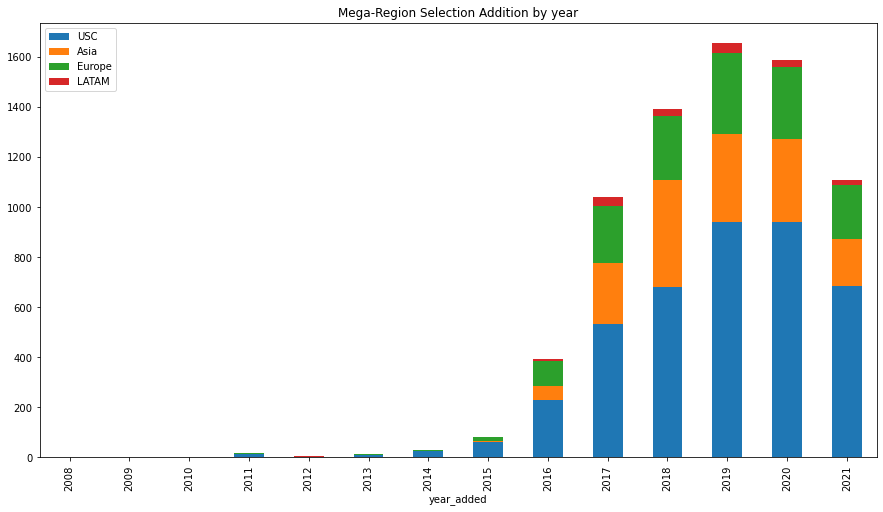

In [577]:
#mega-region analysis

data10=data9.fillna(0)

data10['USC']=data10[['US','Canada']].sum(numeric_only=True,axis=1)
data10['Asia']=data10[['India','Japan','South Korea']].sum(numeric_only=True,axis=1)
data10['Europe']=data10[['UK','France','Spain','Gremany']].sum(numeric_only=True,axis=1)
data10['LATAM']=data10['Mexico']


data10.plot.bar('year_added',['USC','Asia','Europe','LATAM'],stacked=True,width=0.5,figsize=(15,8))
plt.title('Mega-Region Selection Addition by year')


In [658]:
#explore what kind of selection Netflix have within each Mega_Region (USC,Asia,Europe,LATAM)

#In USC Top Genre

USC=df[df.country.str.contains('United States|Canada')]
#get the genre inforation in USC
listed_in_USC = []
for i in range(len(USC)):
    listed_in_USC.extend(USC.listed_in.iloc[i].split(','))

new_list_USC=[]
for i in listed_in_USC:
    new_list_USC.append(i.strip())
    
listed_dic_USC = {}
for i in new_list_USC:
    listed_dic_USC[i] = new_list_USC.count(i)

listed_in_data_USC = {'Genre': listed_dic_USC.keys(), 'Number_of_Movies/shows': listed_dic_USC.values()}
df_genre_USC=pd.DataFrame.from_dict(listed_in_data_USC).set_index("Genre").sort_values(by='Number_of_Movies/shows',ascending=False)

#print(df_genre_USC)


#In Asia Top Genre
Asia=df[df.country.str.contains('India|Japan|South Korea')]
listed_in_Asia=[]
for i in range(len(Asia)):
    listed_in_Asia.extend(Asia.listed_in.iloc[i].split(','))

new_list_Asia=[]
for i in listed_in_Asia:
    new_list_Asia.append(i.strip())
    
listed_dic_Asia={}
for i in new_list_Asia:
    listed_dic_Asia[i]=new_list_Asia.count(i)
    
listed_in_asia = {'Genre': listed_dic_Asia.keys(), 'Number_of_Movies/shows': listed_dic_Asia.values()}
df_genre_Asia=pd.DataFrame.from_dict(listed_in_asia).set_index("Genre").sort_values(by='Number_of_Movies/shows',ascending=False)


#print(df_genre_Asia)

#In Europe Top Genre
Europe=df[df.country.str.contains('UK|France|Spain|Gremany')]
listed_in_Europe=[]
for i in range(len(Europe)):
    listed_in_Europe.extend(Europe.listed_in.iloc[i].split(','))

new_list_Europe=[]
for i in listed_in_Europe:
    new_list_Europe.append(i.strip())
    
listed_dic_Europe={}
for i in new_list_Europe:
    listed_dic_Europe[i]=new_list_Europe.count(i)
    
listed_in_europe = {'Genre': listed_dic_Europe.keys(), 'Number_of_Movies/shows': listed_dic_Europe.values()}
df_genre_Europe=pd.DataFrame.from_dict(listed_in_europe).set_index("Genre").sort_values(by='Number_of_Movies/shows',ascending=False)
#print(df_genre_Europe)


#In LATAM Top Genre
LATAM=df[df.country.str.contains('Mexico')]
listed_in_LATAM=[]
for i in range(len(LATAM)):
    listed_in_LATAM.extend(LATAM.listed_in.iloc[i].split(','))
    
new_list_LATAM=[]
for i in listed_in_LATAM:
    new_list_LATAM.append(i.strip())
    
    
listed_dic_LATAM={}
for i in new_list_LATAM:
    listed_dic_LATAM[i]=new_list_LATAM.count(i)
    
listed_in_latam = {'Genre': listed_dic_LATAM.keys(), 'Number_of_Movies/shows': listed_dic_LATAM.values()}
df_genre_LATAM=pd.DataFrame.from_dict(listed_in_latam).set_index("Genre").sort_values(by='Number_of_Movies/shows',ascending=False)
#print(df_genre_LATAM)





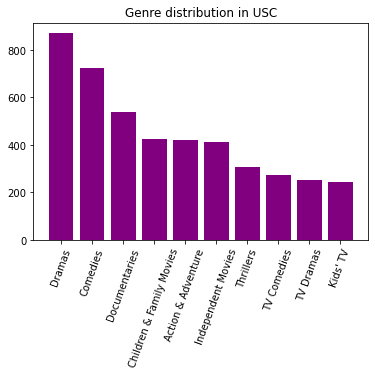

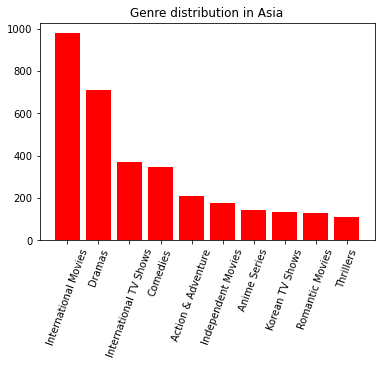

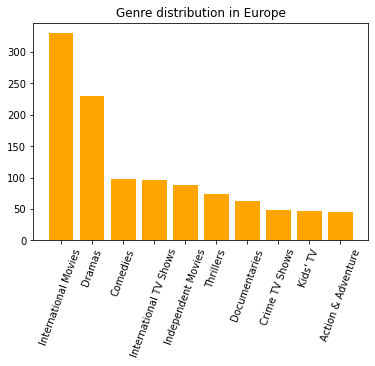

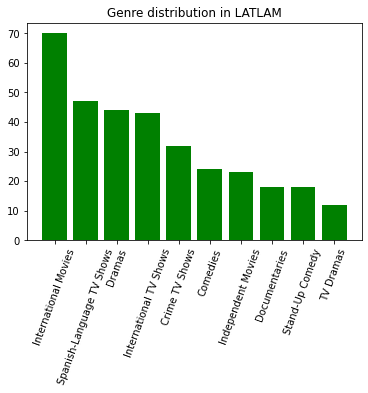

In [661]:
#plot sublot 

#fig = plt.figure()

df_genre_USC=df_genre_USC.reset_index().head(10)
plt.subplot=(2,2,1)
plt.bar(df_genre_USC['Genre'],df_genre_USC['Number_of_Movies/shows'],color='purple')
plt.xticks(rotation=70)
plt.title('Genre distribution in USC')
plt.show()


df_genre_Asia=df_genre_Asia.reset_index().head(10)
plt.subplot=(2,2,2)
plt.bar(df_genre_Asia['Genre'],df_genre_Asia['Number_of_Movies/shows'],color='red')
plt.xticks(rotation=70)
plt.title('Genre distribution in Asia')
plt.show()

df_genre_Europe=df_genre_Europe.reset_index().head(10)
plt.subplot=(2,2,3)
plt.bar(df_genre_Europe['Genre'],df_genre_Europe['Number_of_Movies/shows'],color='orange')
plt.xticks(rotation=70)
plt.title('Genre distribution in Europe')
plt.show()

df_genre_LATAM=df_genre_LATAM.reset_index().head(10)
plt.subplot=(2,2,4)
plt.bar(df_genre_LATAM['Genre'],df_genre_LATAM['Number_of_Movies/shows'],color='green')
plt.xticks(rotation=70)
plt.title('Genre distribution in LATLAM')

#plt.tight_layout()

plt.show()

## Conclusion

- Netflix is doing relative well in terms of adding new movies & shows especially in the last couples of years. 
- Backfilling old movies (not so much TV shows) is one of the selection strategy Netflix is taking. 
- Cultural-specific content is a important piece of Netflix's international expansion strategy. 

##  Learning and Reflection

- This exercise helped me to enhence my skills in data cleaning,visualization and developing simple programs and search functions

- It is extremely important to understand the structure of the dataset before doing any sort of analysis. For example, there are multiple results in countries and listed_in columns for this given dataset. It is important to take time and clean and understand the data before proceeding to any sort of analysis 

- One piece I found missing is user data ( views/preference etc.). A more comprehensive analysis around " How is Netflix doing in terms of meeting users' need?" can be conducted coupled with views and rating data for each movies/shows. 
